In [1]:
import pandas as pd
import seaborn as sns
test = pd.read_csv("/kaggle/input/playground-series-s3e11/test.csv")
train = pd.read_csv("/kaggle/input/playground-series-s3e11/train.csv")

In [2]:
train = train.set_index("id")

In [3]:
train.head()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
id,,,,,,,,,,,,,,,,
0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [4]:
test = test.set_index("id")

In [5]:
test.head()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
id,,,,,,,,,,,,,,,
360336,7.24,4.0,1.0,0.0,2.0,10.80,0.0,1.0,7.0,20319.0,0.0,0.0,0.0,0.0,0.0
360337,6.90,2.0,2.0,2.0,3.0,8.51,1.0,0.0,4.0,33858.0,1.0,0.0,1.0,1.0,1.0
360338,8.34,3.0,0.0,0.0,3.0,8.77,0.0,1.0,14.0,39696.0,0.0,0.0,1.0,1.0,0.0
360339,5.48,2.0,3.0,3.0,2.0,21.90,1.0,0.0,9.0,23688.0,1.0,1.0,1.0,1.0,1.0
360340,4.80,3.0,2.0,0.0,2.0,10.90,1.0,0.0,11.0,27694.0,1.0,1.0,1.0,1.0,1.0


In [6]:
train.columns

Index(['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist',
       'cost'],
      dtype='object')

In [7]:
test.columns

Index(['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist'],
      dtype='object')

In [8]:
print(train.shape)
print(test.shape)

(360336, 16)
(240224, 15)


In [9]:
train.isnull().sum()/len(train)*100

store_sales(in millions)      0.0
unit_sales(in millions)       0.0
total_children                0.0
num_children_at_home          0.0
avg_cars_at home(approx).1    0.0
gross_weight                  0.0
recyclable_package            0.0
low_fat                       0.0
units_per_case                0.0
store_sqft                    0.0
coffee_bar                    0.0
video_store                   0.0
salad_bar                     0.0
prepared_food                 0.0
florist                       0.0
cost                          0.0
dtype: float64

In [10]:
test.isnull().sum()/len(test)*100

store_sales(in millions)      0.0
unit_sales(in millions)       0.0
total_children                0.0
num_children_at_home          0.0
avg_cars_at home(approx).1    0.0
gross_weight                  0.0
recyclable_package            0.0
low_fat                       0.0
units_per_case                0.0
store_sqft                    0.0
coffee_bar                    0.0
video_store                   0.0
salad_bar                     0.0
prepared_food                 0.0
florist                       0.0
dtype: float64

# EDA

In [11]:
import matplotlib.pyplot as plt


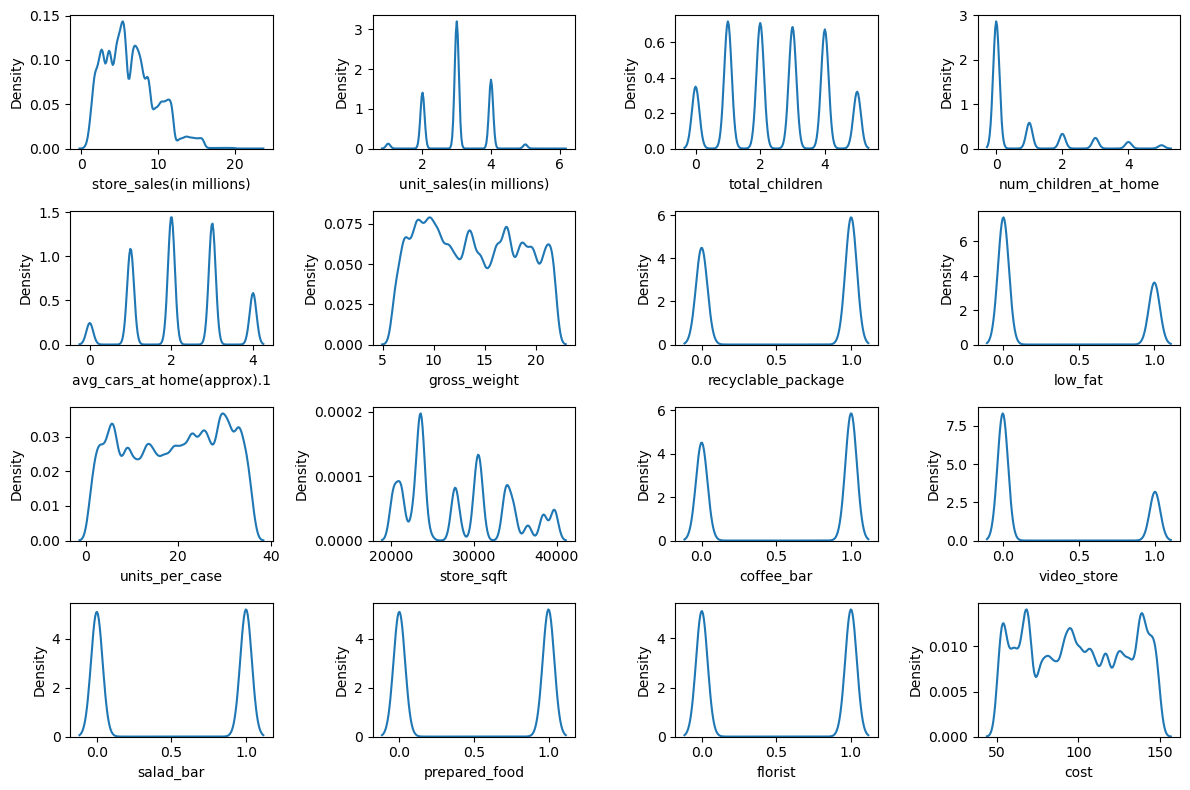

In [12]:
plt.figure(figsize=(12,8))
for i in range(0, len(train.columns)):
    plt.subplot(4,4,i+1)
    sns.kdeplot(x=train[train.columns[i]], label='train')
    plt.tight_layout()

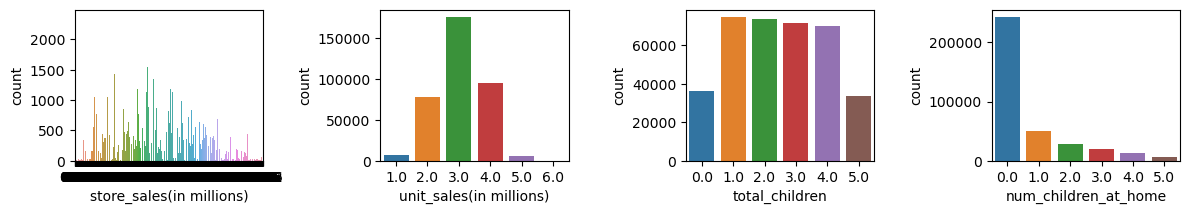

In [13]:
cats = [train.columns[col] for col in [0,1,2,3,4,5,7,8,11,12,13,14,15]]
plt.figure(figsize=(12,6))
for i in range(0,len(cats[:4])):
    plt.subplot(3,4,i+1)
    sns.countplot(x=train[cats[i]])
    plt.tight_layout()

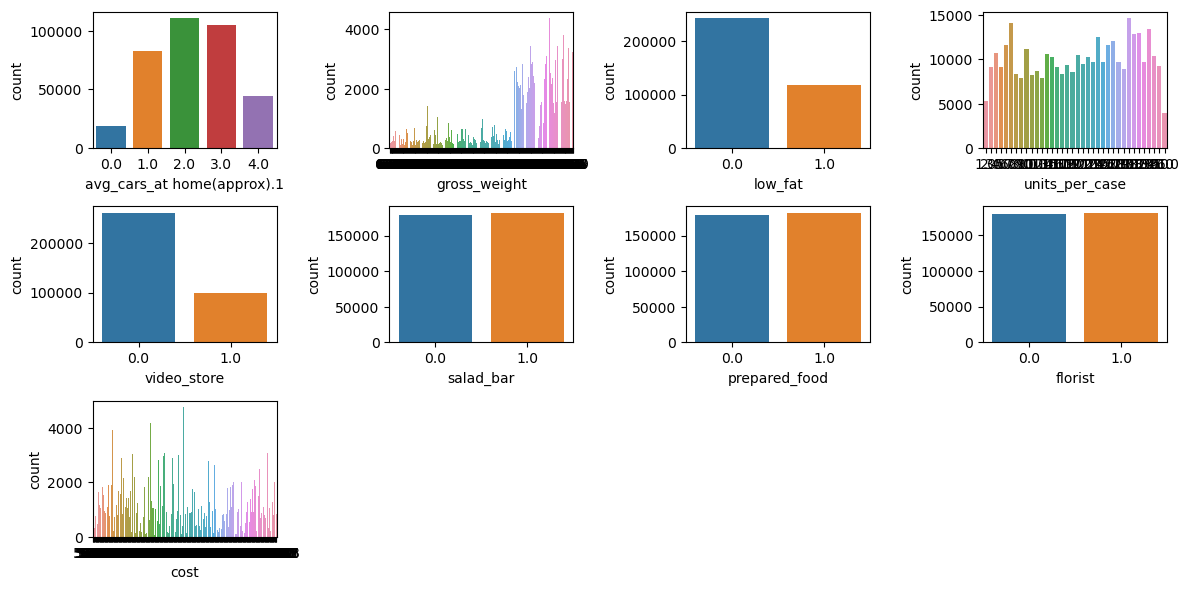

In [14]:
cats_bin = cats[4:]
plt.figure(figsize=(12,6))
for i in range(0,len(cats_bin)):
    plt.subplot(3,4,i+1)
    sns.countplot(x=train[cats_bin[i]])
    plt.tight_layout()

In [15]:
train["prepared_food"].value_counts()

1.0    181909
0.0    178427
Name: prepared_food, dtype: int64

# Test Train Split

In [16]:
X = train.drop("cost",axis=1)
y = train["cost"]

In [17]:
X.head()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
id,,,,,,,,,,,,,,,
0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0
1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0
2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0
3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0
4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0


In [18]:
y.head()

id
0     62.09
1    121.80
2     83.51
3     66.78
4    111.51
Name: cost, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(288268, 15)
(288268,)
(72068, 15)
(72068,)


# Modeling

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error

In [22]:
lr = LinearRegression()
dtree = DecisionTreeRegressor()
lgbmr = LGBMRegressor()
xgbr = XGBRegressor()

In [23]:
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
lr_tr = lr.predict(X_train)
a = mean_squared_log_error(y_train, lr_tr , squared=False)

In [25]:
lrpred = lr.predict(X_test)

In [26]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [27]:
dt_tr = dtree.predict(X_train)
b = mean_squared_log_error(y_train, dt_tr , squared=False)
print(b)

7.160738632548584e-17


In [28]:
dtreepred = dtree.predict(X_test)

In [29]:
lgbmr.fit(X_train,y_train)

LGBMRegressor()

In [30]:
l_tr = lgbmr.predict(X_train)
c = mean_squared_log_error(y_train, l_tr , squared=False)
print(c)

0.30264432256370843


In [31]:
lgbmrpred = lgbmr.predict(X_test)

In [32]:
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [33]:
x_tr = xgbr.predict(X_train)
d = mean_squared_log_error(y_train, x_tr , squared=False)
print(d)

0.297094321271617


In [34]:
xgbrpred = xgbr.predict(X_test)

In [35]:
rmsle_lr = mean_squared_log_error(y_test, lrpred , squared=False)
rmsle_dtree = mean_squared_log_error(y_test, dtreepred , squared=False)
rmsle_lgbmr = mean_squared_log_error(y_test, lgbmrpred , squared=False)
rmsle_xgbr = mean_squared_log_error(y_test, xgbrpred , squared=False)

In [36]:
print("rmsle value for Linear_Regression : ",rmsle_lr-a)
print("rmsle value for DecisionTree_Regressor : ",rmsle_dtree-b)
print("rmsle value for LGBMRegressor : ",rmsle_lgbmr-c)
print("rmsle value for XGBRegressor : ",rmsle_xgbr-d)

rmsle value for Linear_Regression :  -0.0002638423183642935
rmsle value for DecisionTree_Regressor :  0.4198604598141694
rmsle value for LGBMRegressor :  0.0007586132573328408
rmsle value for XGBRegressor :  0.004976661765118073


# LGBMRegressor is the best model 

In [37]:
pred = lgbmr.predict(test)
pred


array([101.22241395,  97.23357933,  97.1926021 , ...,  98.77252514,
       106.72127826, 101.55522592])

In [38]:
result = pd.DataFrame()
result["id"] = test.index
result["cost"] = pred
result = result.set_index("id")

In [39]:
result

,cost
id,
360336,101.222414
360337,97.233579
360338,97.192602
360339,103.031037
360340,83.458237
...,...
600555,101.534648
600556,96.664729
600557,98.772525


In [40]:
result.to_csv("/kaggle/working/submission.csv")

**If you believe this work is valuable, please vote it up. That inspires me much. Feel Free to give your valuable feedback**